In [68]:
import numpy as np
import nibabel as nib
import networkx as nx
from nilearn import image, plotting, regions, input_data

In [2]:
%matplotlib inline

In [3]:
coord_list = np.loadtxt('/home/despoB/DistractWM/data/meta/bna_coords.txt')

In [4]:
bna_include_rois = np.loadtxt('/home/despoB/DistractWM/data/derivatives/group_level_analyses/custom/meta/common-ROIs_exclude-skips__brainnetome.txt', dtype='int')

In [6]:
bna_labels = range(1,247)

In [7]:
include_index = np.in1d(bna_labels, bna_include_rois)

In [8]:
include_index.shape

(246,)

In [9]:
coord_list = coord_list[include_index]

In [10]:
coord_list.shape

(221, 3)

In [11]:
import seaborn as sns
sns.set(style='white')

In [12]:
import matplotlib.pyplot as plt

In [13]:
def prepare_communities_NCT(membership_list):
    n_communities = len(np.unique(membership_list))
    color_pallette = sns.color_palette("muted", n_communities).as_hex()
    module_colors = np.empty(221, dtype='object')
    for mod_id in range(1, n_communities+1):
        module_colors[membership_list == mod_id] = color_pallette[mod_id-1]
    return module_colors, color_pallette

In [14]:
def plot_connectograph(corr_mat, module_colors):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
    ms = ax1.matshow(corr_mat, interpolation="nearest",
               vmax=1, vmin=-1, cmap='RdBu_r')
    plt.colorbar(ms, ax=ax1)
    plotting.plot_connectome(corr_mat, coord_list, node_size=50, edge_cmap='RdBu_r',
                             node_color=list(module_colors), edge_threshold='99.999%', axes=ax2)

In [15]:
import warnings
warnings.filterwarnings("ignore")

# Condition 1: Low Interference, Easy Search

In [139]:
node_memberships_c1 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/group_level_analyses/custom/group_avg_networks/alg-Louvain_thresh-None_gamma-1.0_graphdata/groupavg_task-DistractWM_contrast-cond1_space-MNI152Lin2009Asym_atlas-BNA_GraphPartition.txt')

In [140]:
colors_c1, pallette_c1 = prepare_communities_NCT(node_memberships_c1)

In [141]:
reordered_mat_c1 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/group_level_analyses/custom/group_avg_networks/groupavg_task-DistractWM_contrast-cond1_space-MNI152Lin2009Asym_atlas-BNA_corrmat_z.txt').reshape(221,221)

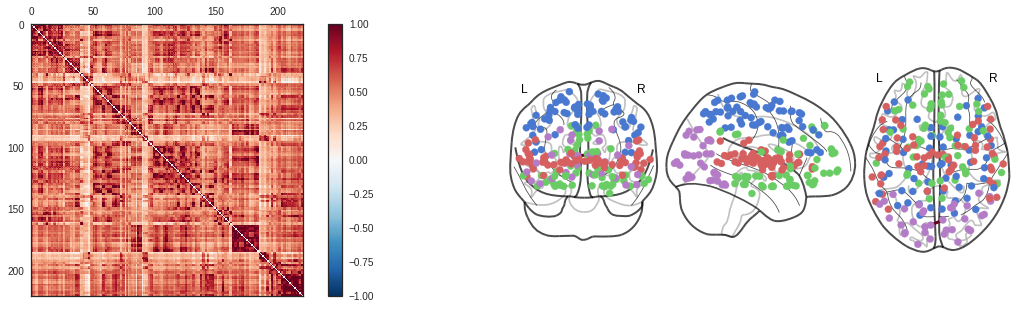

In [142]:
plot_connectograph(reordered_mat_c1, colors_c1)

In [170]:
pc_c1 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/group_level_analyses/custom/group_avg_networks/alg-Louvain_thresh-None_gamma-1.0_graphdata/groupavg_task-DistractWM_contrast-cond1_space-MNI152Lin2009Asym_atlas-BNA_PC.txt')

In [171]:
wmdz_c1 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/group_level_analyses/custom/group_avg_networks/alg-Louvain_thresh-None_gamma-1.0_graphdata/groupavg_task-DistractWM_contrast-cond1_space-MNI152Lin2009Asym_atlas-BNA_WMDz.txt')

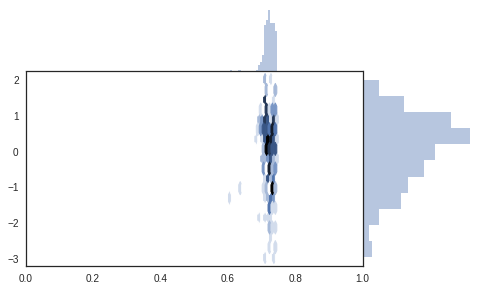

In [172]:
grid = sns.jointplot(pc_c1, wmdz_c1, space=0, stat_func=None, xlim=(0,1), kind='hex', ratio=3)
grid.fig.set_figwidth(7)
grid.fig.set_figheight(4)

# Condition 2: Low Interference, Hard Search

In [177]:
node_memberships_c2 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/group_level_analyses/custom/group_avg_networks/alg-Louvain_thresh-None_gamma-1.0_graphdata/groupavg_task-DistractWM_contrast-cond2_space-MNI152Lin2009Asym_atlas-BNA_GraphPartition.txt')

In [178]:
colors_c2, pallette_c2 = prepare_communities_NCT(node_memberships_c2)

In [179]:
reordered_mat_c2 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/group_level_analyses/custom/group_avg_networks/groupavg_task-DistractWM_contrast-cond2_space-MNI152Lin2009Asym_atlas-BNA_corrmat_z.txt').reshape(221,221)

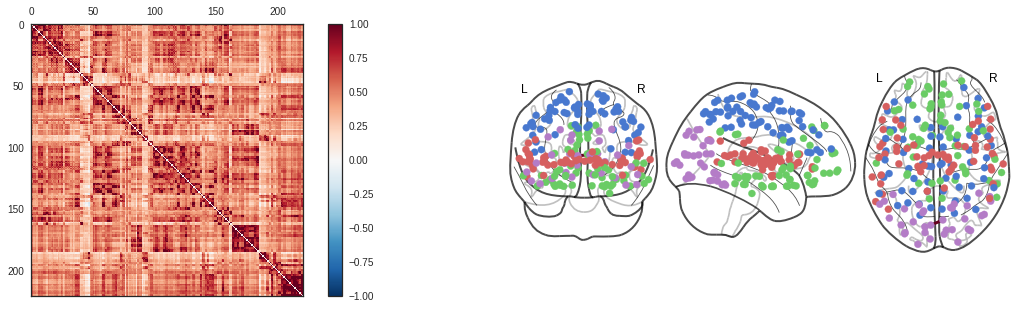

In [180]:
plot_connectograph(reordered_mat_c2, colors_c2)

In [184]:
pc_c2 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/group_level_analyses/custom/group_avg_networks/alg-Louvain_thresh-None_gamma-1.0_graphdata/groupavg_task-DistractWM_contrast-cond2_space-MNI152Lin2009Asym_atlas-BNA_PC.txt')

In [185]:
wmdz_c2 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/group_level_analyses/custom/group_avg_networks/alg-Louvain_thresh-None_gamma-1.0_graphdata/groupavg_task-DistractWM_contrast-cond2_space-MNI152Lin2009Asym_atlas-BNA_WMDz.txt')

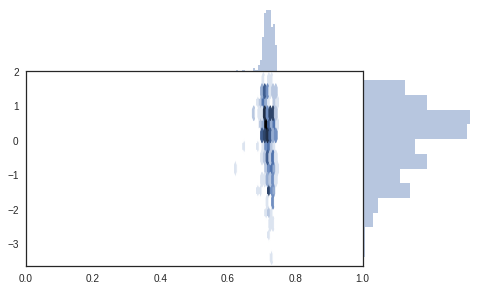

In [186]:
grid = sns.jointplot(pc_c2, wmdz_c2, space=0, stat_func=None, xlim=(0,1), kind='hex', ratio=3)
grid.fig.set_figwidth(7)
grid.fig.set_figheight(4)

# Condition 2: High Interference, Easy Search

In [187]:
node_memberships_c3 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/group_level_analyses/custom/group_avg_networks/alg-Louvain_thresh-None_gamma-1.0_graphdata/groupavg_task-DistractWM_contrast-cond3_space-MNI152Lin2009Asym_atlas-BNA_GraphPartition.txt')

In [188]:
colors_c3, pallette_c3 = prepare_communities_NCT(node_memberships_c3)

In [189]:
reordered_mat_c3 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/group_level_analyses/custom/group_avg_networks/groupavg_task-DistractWM_contrast-cond3_space-MNI152Lin2009Asym_atlas-BNA_corrmat_z.txt').reshape(221,221)

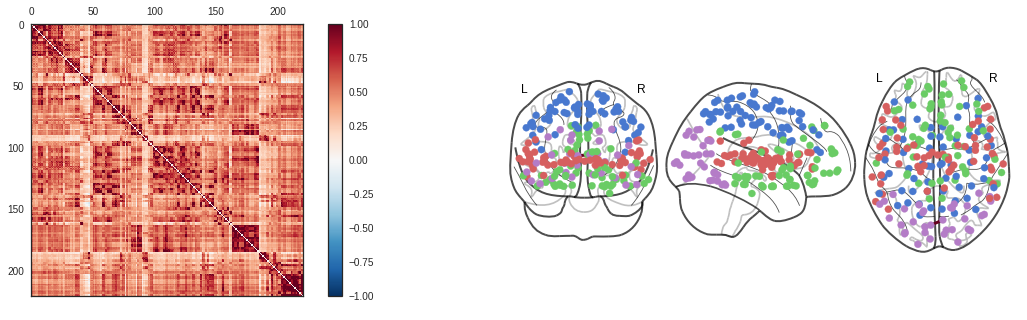

In [190]:
plot_connectograph(reordered_mat_c3, colors_c3)

In [193]:
pc_c3 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/group_level_analyses/custom/group_avg_networks/alg-Louvain_thresh-None_gamma-1.0_graphdata/groupavg_task-DistractWM_contrast-cond3_space-MNI152Lin2009Asym_atlas-BNA_PC.txt')

In [194]:
wmdz_c3 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/group_level_analyses/custom/group_avg_networks/alg-Louvain_thresh-None_gamma-1.0_graphdata/groupavg_task-DistractWM_contrast-cond3_space-MNI152Lin2009Asym_atlas-BNA_WMDz.txt')

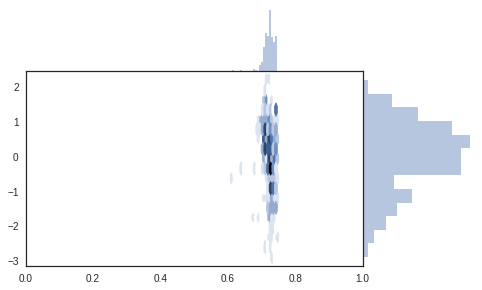

In [195]:
grid = sns.jointplot(pc_c3, wmdz_c3, space=0, stat_func=None, xlim=(0,1), kind='hex', ratio=3)
grid.fig.set_figwidth(7)
grid.fig.set_figheight(4)

# Condition 4: High Interference, Hard Search

In [196]:
node_memberships_c4 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/group_level_analyses/custom/group_avg_networks/alg-Louvain_thresh-None_gamma-1.0_graphdata/groupavg_task-DistractWM_contrast-cond4_space-MNI152Lin2009Asym_atlas-BNA_GraphPartition.txt')

In [197]:
colors_c4, pallette_c4 = prepare_communities_NCT(node_memberships_c4)

In [198]:
reordered_mat_c4 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/group_level_analyses/custom/group_avg_networks/groupavg_task-DistractWM_contrast-cond4_space-MNI152Lin2009Asym_atlas-BNA_corrmat_z.txt').reshape(221,221)

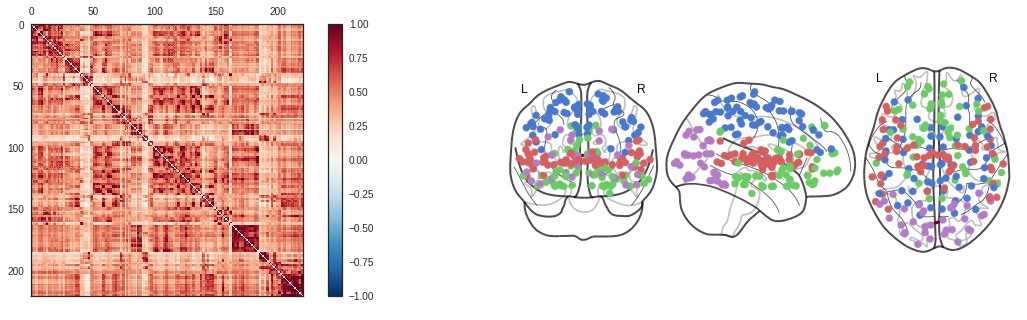

In [199]:
plot_connectograph(reordered_mat_c4, colors_c4)

In [200]:
pc_c4 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/group_level_analyses/custom/group_avg_networks/alg-Louvain_thresh-None_gamma-1.0_graphdata/groupavg_task-DistractWM_contrast-cond4_space-MNI152Lin2009Asym_atlas-BNA_PC.txt')

In [201]:
wmdz_c4 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/group_level_analyses/custom/group_avg_networks/alg-Louvain_thresh-None_gamma-1.0_graphdata/groupavg_task-DistractWM_contrast-cond4_space-MNI152Lin2009Asym_atlas-BNA_WMDz.txt')

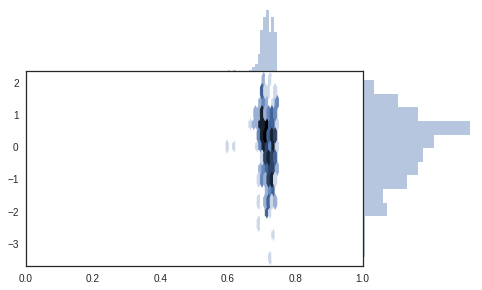

In [202]:
grid = sns.jointplot(pc_c4, wmdz_c4, space=0, stat_func=None, xlim=(0,1), kind='hex', ratio=3)
grid.fig.set_figwidth(7)
grid.fig.set_figheight(4)

# Change across conditions

In [203]:
c1_q = np.loadtxt('/home/despoB/DistractWM/data/derivatives/group_level_analyses/custom/group_avg_networks/alg-Louvain_thresh-None_gamma-1.0_graphdata/groupavg_task-DistractWM_contrast-cond1_space-MNI152Lin2009Asym_atlas-BNA_ModularityQ.txt')
c2_q = np.loadtxt('/home/despoB/DistractWM/data/derivatives/group_level_analyses/custom/group_avg_networks/alg-Louvain_thresh-None_gamma-1.0_graphdata/groupavg_task-DistractWM_contrast-cond2_space-MNI152Lin2009Asym_atlas-BNA_ModularityQ.txt')
c3_q = np.loadtxt('/home/despoB/DistractWM/data/derivatives/group_level_analyses/custom/group_avg_networks/alg-Louvain_thresh-None_gamma-1.0_graphdata/groupavg_task-DistractWM_contrast-cond3_space-MNI152Lin2009Asym_atlas-BNA_ModularityQ.txt')
c4_q = np.loadtxt('/home/despoB/DistractWM/data/derivatives/group_level_analyses/custom/group_avg_networks/alg-Louvain_thresh-None_gamma-1.0_graphdata/groupavg_task-DistractWM_contrast-cond4_space-MNI152Lin2009Asym_atlas-BNA_ModularityQ.txt')

In [204]:
mod_array = np.array([c1_q, c2_q, c3_q, c4_q])

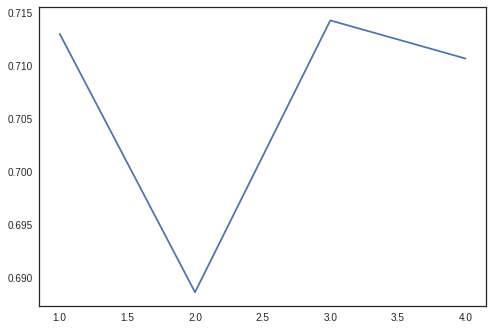

In [205]:
plt.plot(range(1,5), mod_array)